In [1]:
# 필요한 패키지 임포트 및 세팅 
import numpy as np #넘파이: 수치연산을 위한 핵심 라이브러리
import pandas as pd #판다스 : 데이터 로드하기위한 도구

import matplotlib.pyplot as plt #pyplot : 시각화용 라이브러리
import matplotlib # 전체 스타일 설정, 폰트, 그림 크기 등을 제어할 때 사용용

import warnings # 영고 메세지를 제어하기 위한 모듈듈
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로딩 : DataFrame
cust_df=pd.read_csv('./santander-customer-satisfaction/train.csv')
print(cust_df.shape)

(76020, 371)


In [3]:
# 상위 3개행 출력 
cust_df.head(3) 

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
# 데이터 프레임의 전체 구조 정보 요약해 제시
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
# 불균형(레이블) 여부 확인
cust_cnt=cust_df['TARGET'].value_counts()
print(cust_cnt)

TARGET
0    73012
1     3008
Name: count, dtype: int64


In [6]:
# 불만족 고객 비율
cust_rate=cust_cnt[1]/(cust_cnt.sum())
print(f'{cust_rate:.2f}')

0.04


In [7]:
# 데이터 (수치형 변수의 기초 통계량)통계량 확인
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
# var3 feature(변수)에 -999999(이상치)가 몇개인지 확인
print(cust_df['var3'].value_counts())

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 63            1
 194           1
 40            1
 57            1
 87            1
Name: count, Length: 208, dtype: int64


In [9]:
# 데이터 전처리 : -999999(nan) => 2 변경
cust_df['var3'].replace(-999999, 2, inplace=True)

# 2. ID feature : 일련번호로 의미가 없다 => drop
cust_df.drop('ID', axis=1, inplace=True)

In [10]:
# 데이터프레임에서 데이터 / 레이블 분리
X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.loc[:,'TARGET']
print(f'전체 데이터 구조 : {X_features.shape}')

전체 데이터 구조 : (76020, 369)


In [11]:
# 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(
        X_features,
        y_labels,
        test_size=0.2,
        random_state=0
    )

# 학습/테스트 레이블의 균형성 확인
# 학습/테스트 레이블의 개수 저장
train_cnt=y_train.count() # 학습데이터 레이블의 개수
test_cnt=y_test.count() # 테스트데이터 레이블의 개수

print(f'학습 데이터 구조 : {X_train.shape} \
      , 테스트 데이터 구조 : {X_test.shape}')

학습 데이터 구조 : (60816, 369)       , 테스트 데이터 구조 : (15204, 369)


In [12]:
print('학습 데이터 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('테스트 데이터 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 데이터 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64
테스트 데이터 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [13]:
# 학습/검증 데이터 분리
X_tr, X_val, y_tr, y_val = \
    train_test_split(
        X_train,
        y_train,
        test_size=0.3,
        random_state=0
    )
# 학습할 데이터(X_tr, y_tr)와 모델 성능을 검증할 데이터(X_val, y_val)로 나누기
# 학습 데이터(train) 중 일부를 '검증(validation)'용으로 나눈 것
# 다시 나누는 이유? 모델을 훈련한 다음, 바로 테스트데이터를 사용하면 '모델튜닝(최적화)'하기 어려움. 
# 따라서 훈련 데이터 일부를 따로 떼어 검증용 데이터로 사용
# 검증데이터 : 모델의 성능을 중간에 확인, 과적합(overfitting) 여부 판단에도 유용

### 🔹 각 변수의 의미

| 변수         | 설명 |
|--------------|------|
| `X_train`    | 처음 `train_test_split`에서 나온 **학습용 입력 데이터** |
| `y_train`    | 처음 `train_test_split`에서 나온 **학습용 정답 데이터** |
| `test_size=0.3` | 학습 데이터의 **30%를 검증용**, 70%는 학습용으로 사용 |
| `random_state=0` | 결과를 **재현 가능하게** 만드는 시드(seed)값 |
| `X_tr`       | 최종 **학습에 사용할 입력값** |
| `X_val`      | **검증(validation)에 사용할 입력값** |
| `y_tr`       | 최종 **학습에 사용할 정답값** |
| `y_val`      | **검증(validation)에 사용할 정답값** |


In [14]:
# base model test
from xgboost import XGBRFClassifier #XGBoost의 랜덤 포레스트(RF)기반 분류기
from sklearn.metrics import roc_auc_score #ROC AUC 점수 계산용 (추후 모델 평가 시 사용 가능)
# 일반적인 XGBClassifier는 부스팅 기반이지만,XGBRFClassifier는 bagging 기반으로, 전통적인 랜덤 포레스트처럼 작동 


# 모델 객체 생성
xgb_clf=XGBRFClassifier(
    n_estimators=500,#최대 500개의 트리 순차적으로 생성
    learning_rate=0.05,#학습률 (작을수록 학습 속도는 느리지만 일반화 성능이 좋음)
    early_stopping=100, # 검증 성능(AUC)이 100번 동안 개선되지 않으면 학습 중단
    eval_metric='auc', # 모델의 평가지표 AUC 로 설정 
    random_state=156 #랜덤성 고정을 위한 시드 값
)

xgb_clf.fit(X_tr, y_tr, eval_set=[(X_val,y_val)]) # (X_val,y_val) 검증 데이터 설정


[0]	validation_0-auc:0.82893


XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping=100, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='auc', feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.05, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None,
                n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [15]:
# 일반화 성능 
# ROC AUC : 이진 분류 성능을 평가할 때 사용 ->1에 가까울수록 모델이 양성과 음성을 잘 구분
# 0.5는 랜덤 추측과 동일
# roc_auc_score(y_true, y_scores)형식으로 사용
xgb_roc_auc_score=roc_auc_score(
    y_test, # 테스트 데이터셋의 실제 라벨(정답값)
    xgb_clf.predict_proba(X_test)[:,1] # 두번째 열만 선택 ->양성클래스의 예측 확률만 사용 
    # [:,0,1] > 0 : N 확률, 1 : P 확률
) # X_test에 대한 예측 확률을 반환해요. -> 출력 형태는 2차원 배열: [0.9, 0.1], [0.2, 0.8]
# ->  [0.9, 0.1],   # 첫 샘플이 '0'일 확률 90%, '1'일 확률 10%
#  [0.2, 0.8],   # 두 번째 샘플이 '1'일 확률이 80%
print(f'AUC : {xgb_roc_auc_score:.4f}') #AUC 점수를 소수점 네 자리까지 출력:

AUC : 0.8372


---
### XGBoost모델 성능 평가 결과
---
✔️ 처음 일반화 성능으로 돌렸을 때 : 0.8372 

✔️ 하이퍼 파라미터 튜닝 하고 돌리면 : 0.8466

In [16]:
# hyperopt, KFold 사용한 튜닝
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# 목적 함수(objective_func) 설정. ->목적함수란? 하이퍼파라미터튜닝시, 어떤 값이 좋은 하이퍼파라미터인가를 
# 평가하는 기준 함수,  주어진 파라미터로 모델을 학습하고, ROC AUC 점수의 평균을 리턴
# HyperOpt는 값이 가장 작아지는 방향으로 튜닝하므로, 반환값에 -1을 곱함
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space): # 튜닝 대상 하이퍼파라미터 값이 딕셔너리 형태
# 1. XGBoost 모델 생성 -> 하이퍼파라미터 값들을 search_space에서 받아서 모델에 적용
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                            , early_stopping_rounds=30 #30번 연속 성능-> 개선 없으면 학습 종료
                            , eval_metric='auc' # 평가지표로 AUC 사용
    )
    
# 2. 3-Fold 교차 검증 설정
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    # => 💖3개의 Fold로 데이터를 분할해서 모델을 3번 학습 + 평가
    roc_auc_list= [] #결과는 roc_auc_list에 담김

    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    
    
# 3. 교차검증 루프
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train): # X_train : 6만건
# X_train 데이터를 3개로 나눠서, 반복 학습/평가
# 각 루프에서 X_tr, X_val로 학습/검증 데이터를 나눔눔

        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index] 
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr,eval_set=[(X_tr, y_tr), (X_val, y_val)]) #💚조기종료 기능을 사용해 모델학습
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        # 검증 데이터에 대해 예측한 Positive 클래스 확률로 ROC AUC 점수 계산
        roc_auc_list.append(score)
        
        
# 4. 평균 AUC 반환 (최소화하기 위해 음수 부호)
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)
# ✔️Hyperopt는 최소화 문제로 처리하기 때문에 음수로 바꾸는 것!

In [18]:
import pandas as pd
import numpy as np
from hyperopt import fmin, tpe, Trials, hp, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# 1. 데이터 불러오기
data = pd.read_csv('./santander-customer-satisfaction/train.csv')
X = data.drop(['TARGET', 'ID'], axis=1)
y = data['TARGET']

# 2. 전역 변수로 사용될 train set 정의
X_train = X
y_train = y

# 하이퍼파라미터 탐색 공간 정의
xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 3, 7, 1),               # 정수형: 3~7
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1), # 정수형: 1~10
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),  # 실수형: 0.5~1.0
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3)        # 실수형: 0.01~0.3
}

# 성능향상을 위한 조기종료(early stopping)
def objective_func(params):
    params['max_depth'] = int(params['max_depth'])
    params['min_child_weight'] = int(params['min_child_weight'])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_list = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = xgb.XGBClassifier(
            n_estimators=1000,  # 많이 주고 조기 종료로 자동 제어
            early_stopping_rounds=50,
            eval_metric='auc',
            use_label_encoder=False,
            **params
        )

        model.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)],
            verbose=False
        )

        preds = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, preds)
        auc_list.append(auc)

    return {'loss': -np.mean(auc_list), 'status': STATUS_OK}

# 하이퍼파라미터 자동최적화(Auto Hyperparameter Optimization)를 위해 Hyperopt 라이브러리의 fmin()함수 사용
from hyperopt import fmin, tpe, Trials

trials = Trials() # 각 반복에서의 하이퍼파라미터 조합, 손실값, 모델 성능 등을 저장하는 용도
# -> 나중에 성능 추이 시각화 등에도 활용

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space, #하이퍼파라미터 탐색공간
            algo=tpe.suggest, #하이퍼파라미터 탐색 방법
            max_evals=100, # 최대 반복 횟수를 지정->총 100번 반복 (100개의 서로 다른 하이퍼파라미터 조합테스트)
            trials=trials, rstate=np.random.default_rng(seed=30))# trials=trials:반복과정 로그저장 객체
# rstate: 랜덤 시드 고정 (결과 재현 가능하게 하기 위해)

print('best:', best)
# 최적의 하이퍼파라미터 조합을 출력

100%|██████████| 100/100 [1:34:29<00:00, 56.69s/trial, best loss: -0.8414632241867211]
best: {'colsample_bytree': np.float64(0.6730825472927922), 'learning_rate': np.float64(0.01302360833406058), 'max_depth': np.float64(5.0), 'min_child_weight': np.float64(6.0)}


In [19]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
# ✔️1. 최적의 하이퍼파라미터로 XGBoost 분류기 생성
xgb_clf = XGBClassifier(
    n_estimators=500, #최대 500개의 트리를 사용하겠다는 뜻(조기 종료 설정으로 일찍 멈출 수 있음)
    learning_rate=round(best['learning_rate'], 5), #학습률(하이퍼파라미터 최적화 결과에서 가져옴
    max_depth=int(best['max_depth']), #트리의 최대 깊이 (오버피팅 방지에 도움)
    min_child_weight=int(best['min_child_weight']), #분할을 위한 최소가중치 합(값이 클수록 규제 강함)
    colsample_bytree=round(best['colsample_bytree'], 5),#트리마다 사용할 피처의 비율 (0.5~1.0)
    early_stopping_rounds=100,#검증 점수가 100번 연속 개선되지 않으면 학습 조기 종료
    eval_metric="auc", #평가 지표로 ROC AUC 사용
    n_jobs=-1 #모든 CPU 코어 사용하여 병렬 학습
)

# ✔️2. 모델 학습 수행
# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(
    X_tr, y_tr, #학습데이터터
    eval_set=[(X_tr, y_tr), (X_val, y_val)] #검증데이터
) #eval_set :학습 도중 이 데이터를 이용해 성능을 모니터링
# → 조기 종료 조건(early_stopping_rounds=100)에 따라 검증 점수가 향상되지 않으면 학습 중단

# ✔️3. 테스트 데이터로 ROC AUC 평가
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
# predict_proba(X_test)[:,1] : 클래스 1(만족하지 않은 고객)일 확률을 예측
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
# roc_auc_score(): 실제 레이블 y_test와 예측 확률을 이용해 ROC AUC 계산
# → ROC AUC는 1에 가까울수록 성능이 좋음

[0]	validation_0-auc:0.76022	validation_1-auc:0.73394
[1]	validation_0-auc:0.76066	validation_1-auc:0.73432
[2]	validation_0-auc:0.77001	validation_1-auc:0.74548
[3]	validation_0-auc:0.81417	validation_1-auc:0.79483
[4]	validation_0-auc:0.81297	validation_1-auc:0.79453
[5]	validation_0-auc:0.82190	validation_1-auc:0.80511
[6]	validation_0-auc:0.82766	validation_1-auc:0.81129
[7]	validation_0-auc:0.82997	validation_1-auc:0.81454
[8]	validation_0-auc:0.82988	validation_1-auc:0.81357
[9]	validation_0-auc:0.83244	validation_1-auc:0.81628
[10]	validation_0-auc:0.83110	validation_1-auc:0.81475
[11]	validation_0-auc:0.83325	validation_1-auc:0.81747
[12]	validation_0-auc:0.83187	validation_1-auc:0.81602
[13]	validation_0-auc:0.83153	validation_1-auc:0.81494
[14]	validation_0-auc:0.83290	validation_1-auc:0.81603
[15]	validation_0-auc:0.83198	validation_1-auc:0.81552
[16]	validation_0-auc:0.83294	validation_1-auc:0.81623
[17]	validation_0-auc:0.83256	validation_1-auc:0.81552
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

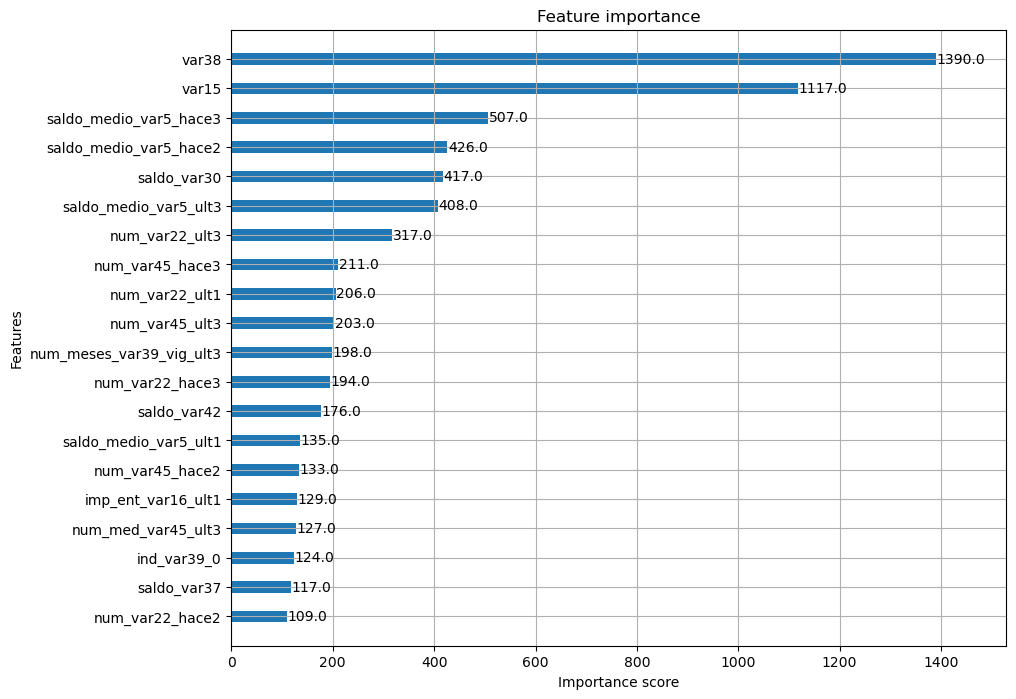

In [20]:
# 특성 중요도 시각화
from xgboost import plot_importance # XGBoost 라이브러리에서 제공하는 특성 중요도 시각화 함수 불러옵
# -> 학습된 모델이 어떤 피처를 얼마나 중요하게 생각했는지 시각적으로 보여줌
import matplotlib.pyplot as plt # 시각화 라이브러리 matplotlib 불러옴 
# -> 그래프를 그릴 때 거의 항상 쓰이는 필수 도구

# 시각화를 위한 Figure와 Axes 객체 생성
fig, ax=plt.subplots(1,1,figsize=(10,8)) #그래프크기 : 가로 10인치, 세로 8인치 설정
# fig   → 전체 그래프 영역 (종이)
# ax    → 실제 그래프가 그려질 좌표 공간 (캔버스)
plot_importance(xgb_clf,ax=ax, max_num_features=20, height=0.4)
# xgb_clf: 학습 완료된 XGBoost 모델
# ax=ax: 위에서 만든 그래프 축에 그리겠다는 의미
# max_num_features=20: 상위 20개의 중요한 피처만 출력
# height=0.4: 바 차트의 막대 두께 설정

In [21]:
# 1. 모델 생성 : lightGBM 기본 모델 사용
from lightgbm import LGBMClassifier #LightGBM의 분류기 (Gradient Boosting 기반)
from sklearn.metrics import roc_auc_score #모델 성능 지표 : AUC (ROC AUC) 평가

lgbm_clf=LGBMClassifier(
    n_estimators=500, #최대 500개의 트리를 사용해 학습
    early_stopping_rounds=100,#조기 종료 조건
    eval_metric='auc' #eval_metric='auc': AUC를 성능 기준으로 
#(0.5는 랜덤 예측, 1.0에 가까울수록 좋은 분류기)
)

# 2. 학습 및 검증 데이터 세트 설정정
eval_set=[(X_tr,y_tr),(X_val,y_val)] # 학습/검증 데이터 세팅

# 3. 모델 학습
lgbm_clf.fit(X_tr, y_tr, eval_set=eval_set) #모델 학습 시 eval_set을 주면 
# -> 학습 중간에 검증 데이터로 평가하면서 성능이 얼마나 좋아지는지 체크 가능
# 주어진 학습 데이터를 사용해서 모델을 훈련
# eval_set에서 조기 종료를 위한 검증 진행됨
# LightGBM: 내부적으로 조기 종료 트릭을 사용해 과적합을 방지

# 4. 테스트 데이터에 대해 ROC AUC 점수 평가
# 일반화 성능 확인
lgbm_roc_auc_score=\
    roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])

# 5. 최종결과 출력
print(f'AUC : {lgbm_roc_auc_score:.4f}') #소수정 4쨰 자리까지 출력

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
Training un

In [22]:
# hyperopt, kFold 사용
from hyperopt import hp #탐색 공간 범위를 정의 할 때 사용
lgbm_search_space = { # 하이퍼 파라미터 탐색 공간 정의 : 모델 성능 높이기 위한 과정
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}


---
###  하이퍼파라미터 설명 (LightGBM 기준)
---

| 파라미터명          | 설명                                                                 | 현재 설정된 범위               |
|--------------------|----------------------------------------------------------------------|-------------------------------|
| `num_leaves`        | 하나의 트리에서 생성할 수 있는 최대 리프 노드 수. 너무 크면 과적합 우려 있음 | `32 ~ 64` (정수형, 간격 1)      |
| `max_depth`         | 트리의 최대 깊이. 모델 복잡도를 제한하여 과적합 방지                         | `100 ~ 160` (정수형, 간격 1)    |
| `min_child_samples` | 하나의 리프 노드가 갖춰야 할 최소 샘플 개수. 작을수록 과적합, 클수록 일반화     | `60 ~ 100` (정수형, 간격 1)     |
| `subsample`         | 전체 데이터 중 일부만 사용해 학습하는 샘플링 비율. 과적합 방지                 | `0.7 ~ 1.0` (연속 실수)         |
| `learning_rate`     | 학습률 (트리를 얼마나 느리게 학습시킬지). 작을수록 성능 높지만 학습 오래 걸림   | `0.01 ~ 0.2` (연속 실수)        |


### ✔️ `hp.quniform()` vs `hp.uniform()`

| 함수 형태                       | 반환값 설명                                  | 예시 사용법                                  |
|--------------------------------|----------------------------------------------|----------------------------------------------|
| `hp.quniform('param', a, b, q)` | `a`부터 `b`까지 `q` 간격의 **정수 값** 반환        | `int(hp.quniform('max_depth', 3, 10, 1))`     |
| `hp.uniform('param', a, b)`     | `a`부터 `b` 사이의 **연속 실수** 반환              | `hp.uniform('learning_rate', 0.01, 0.2)`      |

> 💡 `hp.quniform()`을 사용한 값은 **int로 변환**해서 모델에 넣어야 실제로 동작  
> 예: `int(hp.quniform(...))` 형태로 사용

---

### ✔️ 왜 이런 하이퍼파라미터 범위를 사용할까?

- 이 범위들은 **실무나 캐글(Kaggle)** 대회에서 LightGBM 성능이 가장 잘 나오는 **경험적 최적 범위**

- 범위를 **너무 넓게** 잡으면 → 탐색 시간이 길어지고
- 범위를 **너무 좁게** 잡으면 → 성능 좋은 조합을 **놓칠 수 있음**

✅ **결론**:  
→ **탐색 효율성과 성능**을 모두 고려한 적절한 하이퍼파라미터 범위 설정


In [23]:
# Hyperopt와 KFold 교차검증을 활용해 LightGBM 모델의 성능(AUC) 최적화
from sklearn.model_selection import KFold
# KFold : 데이터를 여러 부분으로 나눠 교차 검증을 수행하는 데 사용

def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(
        n_estimators=100, num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']), 
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_jobs=-1,
        early_stopping_rounds=30, 
        eval_metric="auc",
    )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, 
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

---
### 🔍 Hyperopt란?
---
`Hyperopt`는 머신러닝 모델의 하이퍼파라미터 튜닝을 위한 **베이지안 최적화 기반 자동화 도구**  
기존의 GridSearchCV나 RandomSearchCV보다 더 효율적으로 **최적의 파라미터 조합을 탐색**

---

### 💫 특징

- **Bayesian Optimization 기반**  
  → 이전 시도 결과를 반영하여, 다음 탐색 방향을 **더 똑똑하게 유도**

- **빠른 탐색 & 효율적 성능 향상**  
  → 전체 하이퍼파라미터 공간을 다 보지 않아도 좋은 결과 가능

- **TPE 알고리즘 사용 (Tree-structured Parzen Estimator)**  
  → 연속형 / 범주형 파라미터 모두 지원

---

### ✔️ 핵심 함수 요약

| 함수 | 설명 |
|------|------|
| `fmin()` | 최적의 하이퍼파라미터 조합을 찾는 핵심 함수 |
| `tpe.suggest` | 탐색 전략으로 TPE를 사용 |
| `Trials()` | 반복 결과를 저장하는 객체 (시도한 파라미터, 성능 등 기록) |

---

### 🙌 작동 흐름 요약

```python
from hyperopt import fmin, tpe, hp, Trials

# 1. 탐색할 파라미터 공간 정의
search_space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.choice('max_depth', range(3, 10))
}

# 2. 목적 함수 정의 (loss를 반환)
def objective(params):
    model = SomeModel(**params)
    score = cross_val_score(model, X, y, cv=3, scoring='roc_auc').mean()
    return -score  # 최대화 문제 → 음수로 변환하여 최소화

# 3. Trials 객체로 반복 기록 저장
trials = Trials()

# 4. fmin으로 최적 파라미터 찾기
best = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

print("Best parameters:", best)


In [24]:
# LightGBM 모델의 성능을 AUC 기준으로 극대화하기 위한 하이퍼파라미터 자동 탐색 수행
from hyperopt import fmin, tpe, Trials
# Hyperopt 라이브러리에서 최적화 함수들과 탐색 전략(TPE), 그리고 실험 기록용 객체를 불러옴.

trials = Trials() #실험(trials) 정보를 저장할-> 어떤 하이퍼파라미터로 어떤 점수가 나왔는지 등 반복 학습의 이력을 모두 저장.

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best) #최종적으로 가장 성능이 좋았던 하이퍼파라미터 조합 출력

[LightGBM] [Warning] Unknown parameter: eval_metric   
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] Unknown parameter: eval_metric   
[LightGBM] [Info] Number of positive: 1966, number of negative: 48714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13571                    
[LightGBM] [Info] Number of data points in the train set: 50680, number of used features: 208
[LightGBM] [Warning] Unknown parameter: eval_metric   
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038792 -> initscore=-3.209965
[LightGBM] [Info] Start training from scor

In [25]:
# Hyperopt로 찾은 최적 하이퍼파라미터를 사용하여 LightGBM 모델 훈련,
# 테스트셋에서 AUC 성능 평가
# 일반화 성능 확인
# 💫 1. 모델 정의 
lgbm_clf =  LGBMClassifier(
    n_estimators=500, num_leaves=int(best['num_leaves']), #최대 500개의 트리 학습(조기 종료될 수 있음)
    max_depth=int(best['max_depth']), # 트리 최대 깊이 제한 (오버피팅 방지)
    min_child_samples=int(best['min_child_samples']), # 리프 노드가 되기 위한 최소 데이터 수
    subsample=round(best['subsample'], 5), # 매번 학습에 사용할 데이터 샘플링 비율 (0~1)
    learning_rate=round(best['learning_rate'], 5), # 학습률 (너무 크면 불안정, 너무 작으면 느림)
    early_stopping_rounds=10, #검증 성능이 10번 연속 향상되지 않으면 학습 중단
    eval_metric='auc' #평가 지표로 AUC 사용
)

# 💫 2. 모델 학습 (훈련 + 검증)
# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(
    X_tr, y_tr,eval_set=[(X_tr, y_tr), (X_val, y_val)] #훈련데이터셋, 검증데이터셋
)#eval_set: 학습 중 성능을 추적할 데이터셋 리스트
# early_stopping_rounds에 따라 검증 성능이 정체되면 학습을 조기 종료함 -> 과적합방지, 최적 반복 수에서 멈추도록 함

# 💫 3. 테스트셋 예측 성능 평가 
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
# → 클래스 1 (만족하지 못한 고객)에 대한 확률값 예측
# roc_auc_score :ROC AUC는 이진 분류에서 분류 확신도 + 순서까지 고려한 지표
# → 1.0이면 완벽, 0.5면 랜덤 예측 수준

print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12898
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 192
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
Training until va

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


[LightGBM] [Info] Number of positive: 1804, number of negative: 43808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13532
[LightGBM] [Info] Number of data points in the train set: 45612, number of used features: 248
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039551 -> initscore=-3.189810
[LightGBM] [Info] Start training from score -3.189810
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.819813	valid_0's binary_logloss: 0.156654

[테스트 데이터 성능 평가]
AUC: 0.8286
정확도 (Accuracy): 0.9604
정밀도 (Precision): 0.0000
재현율 (Recall): 0.0000
F1 점수: 0.0000
오차 행렬:
[[14602     0]
 [  602     0]]


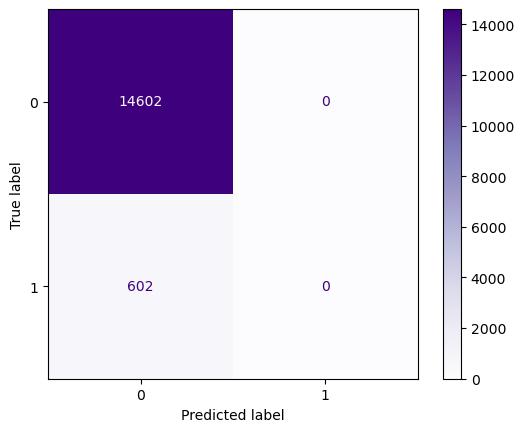

In [27]:
# 필요한 라이브러리 불러오기
import pandas as pd # 데이터 처리용 기본 라이브러리
import numpy as np
from lightgbm import LGBMClassifier, early_stopping, log_evaluation # LightGBM의 sklearn 스타일 분류기
# early_stopping / log_evaluation: 학습 중 조기 종료 및 로그 출력용 콜백
from sklearn.model_selection import train_test_split #데이터를 학습/검증/테스트로 나누는 데 사용
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, ConfusionMatrixDisplay
) #metrics: 다양한 모델 성능 평가 지표를 위한 함수들

# 1. 데이터 로드
# ID는 식별자이므로 제거하고, TARGET은 예측할 이진 클래스(0 or 1)
data = pd.read_csv('./santander-customer-satisfaction/train.csv')
X = data.drop(['ID', 'TARGET'], axis=1)
y = data['TARGET']

# 2. 데이터 분할 (train:val:test = 60:20:20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# 테스트 데이터 20%분리 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
# 두 번째 줄: 나머지 80% 중에서 25%를 검증 세트로 → 결과적으로 60:20:20 비율
# stratify=y를 통해 클래스 불균형을 그대로 유지


# 3. LGBM 모델 정의
model = LGBMClassifier(
    objective='binary', #이진분류문제
    is_unbalance=True,#클래스 비율 불균형 고려 (TARGET=1이 적음)
    learning_rate=0.05, # 학습률 (작을수록 안정적, 느리게 학습)
    num_leaves=31,#결정 트리에서 leaf node 수 → 복잡도 조절
    n_estimators=1000,# 최대 부스팅 라운드 수
    random_state=42,
    n_jobs=-1 #모든 CPU 코어 사용
)

# 4. 모델 학습 (callbacks로 조기 종료와 로그 설정)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50), # 검증 데이터를 사용해서 AUC 기준으로 조기 종료
        # 50번 연속으로 성능 개선 없으면 학습 중단
        log_evaluation(period=100) #100 라운드마다 로그 출력
    ]
)

# 5. 테스트 데이터 예측
y_proba = model.predict_proba(X_test)[:, 1] #클래스1의 확률만 추출
y_pred = (y_proba >= 0.2).astype(int) #0.5 기준으로 이진분류

# 6. 성능 지표 계산
#예측 확률로부터 AUC 계산
# 이진 분류 결과를 바탕으로 정확도, 정밀도, 재현율, F1 점수 계산
auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred) #오차행렬 함께 출력

# 7. 결과 출력
print(f'\n[테스트 데이터 성능 평가]')
print(f'AUC: {auc:.4f}')
print(f'정확도 (Accuracy): {acc:.4f}')
print(f'정밀도 (Precision): {prec:.4f}')
print(f'재현율 (Recall): {recall:.4f}')
print(f'F1 점수: {f1:.4f}')
print(f'오차 행렬:\n{cm}')

# 8. 오차 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')


[LightGBM] [Info] Number of positive: 1804, number of negative: 43808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13532
[LightGBM] [Info] Number of data points in the train set: 45612, number of used features: 248
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039551 -> initscore=-3.189810
[LightGBM] [Info] Start training from score -3.189810
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.819813	valid_0's binary_logloss: 0.156654

[학습 데이터 성능 평가]
AUC: 0.8369
정확도 (Accuracy): 0.9604
정밀도 (Precision): 0.0000
재현율 (Recall): 0.0000
F1 점수: 0.0000
오차 행렬:
[[43808     0]
 [ 1804     0]]


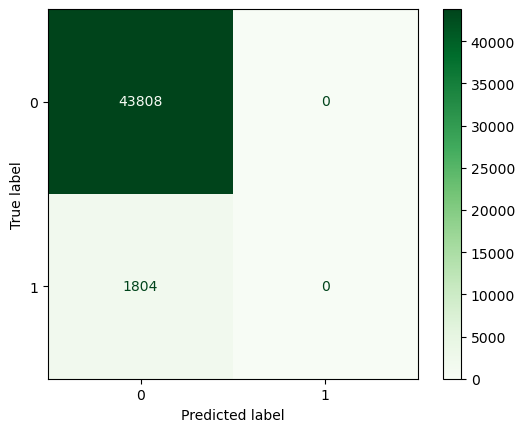

In [28]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, ConfusionMatrixDisplay
)

# 1. 데이터 로드
data = pd.read_csv('./santander-customer-satisfaction/train.csv')
X = data.drop(['ID', 'TARGET'], axis=1)
y = data['TARGET']

# 2. 데이터 분할 (train:val:test = 60:20:20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# 3. LightGBM 모델 정의
model = LGBMClassifier(
    objective='binary',
    is_unbalance=True,
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1000,
    random_state=42,
    n_jobs=-1
)

# 4. 모델 학습
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

# 5. 학습 데이터에 대한 예측
y_proba = model.predict_proba(X_train)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

# 6. 성능 지표 계산 (학습 데이터 기준)
auc = roc_auc_score(y_train, y_proba)
acc = accuracy_score(y_train, y_pred)
prec = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
cm = confusion_matrix(y_train, y_pred)

# 7. 결과 출력
print(f'\n[학습 데이터 성능 평가]')
print(f'AUC: {auc:.4f}')
print(f'정확도 (Accuracy): {acc:.4f}')
print(f'정밀도 (Precision): {prec:.4f}')
print(f'재현율 (Recall): {recall:.4f}')
print(f'F1 점수: {f1:.4f}')
print(f'오차 행렬:\n{cm}')

# 8. 오차 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')


In [29]:
# randomforest 모델 사용
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# 1. 데이터 로딩
data = pd.read_csv('./santander-customer-satisfaction/train.csv')

# 2. 특성과 타겟 분리
X = data.drop(['ID', 'TARGET'], axis=1)
y = data['TARGET']
# X: 입력 피처 (모든 변수에서 ID와 TARGET 제외)
# y: 예측 대상 클래스 (0 = 만족, 1 = 불만족)

# 3. 학습/검증/테스트 세트 분리 (60:20:20 비율)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #첫번째 분할
# 80%: 학습+검증용 (X_temp), 20%: 테스트용 (X_test)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
# 두번쨰 분할: X_temp를 75%:25%로 나눠 → 결과적으로: 학습 60%, 검증 20%, 테스트 20%
# stratify=y: 클래스 비율 유지 (불균형 데이터에서 중요!)

# 4. 랜덤포레스트 모델 생성 및 학습
rf_clf = RandomForestClassifier(
    n_estimators=200,         # 트리 개수
    max_depth=12,             # 트리 깊이 제한 (조절 가능, 과적합 방지)
    min_samples_leaf=10,      # 최소 리프 노드 샘플 수 (너무 작은 노드는 방지)
    max_features='sqrt',      # 특성 샘플링 방법:각 트리에서 무작위로 사용할 피처 비율 (sqrt는 √전체 피처 수)
    random_state=42,
    n_jobs=-1                 # 모든 cpu코어 사용
)

rf_clf.fit(X_train, y_train) #학습 데이터를 기반으로 트리 앙상블을 학습시킴

# 5. 검증 데이터로 성능 평가 (ROC AUC 기준)
val_probs = rf_clf.predict_proba(X_val)[:, 1] #predict_proba: 클래스 1(불만족)일 확률 추출
val_auc = roc_auc_score(y_val, val_probs) #roc_auc_score: 이진분류의 성능을 평가하는 핵심지표(1.0에 가까울수록 좋음)
print(f'### 검증 AUC: {val_auc:.4f}') # 검증 데이터에서의 모델 성능 확인

# 6. 테스트 데이터로 일반화 성능 확인
# 실제 현업에서 가장 중요한 테스트셋에서의 AUC 확인
# 과적합 여부, 실전 성능 판단 기준
test_probs = rf_clf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probs)
print(f'### 테스트 AUC (일반화 성능): {test_auc:.4f}')


### 검증 AUC: 0.8171
### 테스트 AUC (일반화 성능): 0.8216


---
## 📊 RandomForestClassifier vs LGBMClassifier 비교표
---
| 항목              | RandomForestClassifier                     | LGBMClassifier                           |
|-------------------|---------------------------------------------|-------------------------------------------|
| **모델 타입**     | 배깅 앙상블 (Bagging)                      | 부스팅 앙상블 (Boosting)                 |
| **기반 알고리즘** | 다수의 독립적인 Decision Tree              | Gradient Boosting (GBDT)                 |
| **학습 방식**     | 병렬 학습 (독립적 트리)                    | 순차 학습 (이전 오차를 보정하며 학습)    |
| **과적합 방지**   | 무작위 특성 선택 + 데이터 샘플링          | 정규화 파라미터 + 조기 종료             |
| **예측 속도**     | 보통                                        | 빠름 (Histogram 기반 학습)              |
| **하이퍼파라미터**| 비교적 단순 (`max_depth`, `n_estimators` 등)| 다양하고 정교 (`num_leaves`, `learning_rate` 등) |
| **성능**          | 안정적, 빠르게 구축 가능                   | 고성능, 정교한 튜닝 가능                 |
| **사용 추천**     | 기본 베이스라인 모델                       | 정밀 예측, 대회, 금융 등                 |

---

📌 **요약**  
- `RandomForestClassifier`는 간편하고 빠르게 적용 가능하며, 해석이 용이한 모델입니다.  
- `LGBMClassifier`는 성능이 매우 뛰어나지만, **하이퍼파라미터 튜닝이 중요**합니다.



In [30]:
# randomforest 모델 성능 향상(이진분류모델 만들기) 
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1. 데이터 불러오기
data = pd.read_csv('./santander-customer-satisfaction/train.csv')
X = data.drop(['ID', 'TARGET'], axis=1) # id는 식별자-> 제거거
y = data['TARGET'] # target : 예측할 레이블 -> 따로 분리

# 2. 로그 변환 적용 (0보다 큰 값에만)-> 스케일 조정, 분포완화
log_transformer = FunctionTransformer(lambda x: np.log1p(x), validate=True)
X = log_transformer.fit_transform(X)
# np.log1p → 0 이상의 값에 로그를 적용 (0이면 그대로, 100이면 log(101))
# -> 데이터의 스케일을 줄이고 이상치를 완화


# 3. 이상치 제거 (컬럼명 복구 + clip)
X = pd.DataFrame(X, columns=data.drop(['ID', 'TARGET'], axis=1).columns)
X = X.clip(-10, 10) # 로그변환된 데이터 중 극단값을 [-10, 10] 범위로 제한 →모델의 안정성을 높이기 위함


# 4. 파생 변수 예시 추가 (예: 모든 변수 평균/표준편차)
X['row_mean'] = X.mean(axis=1) #행 기준 평균 / 표준편차 → 전체 피처의 종합적 정보 요약
X['row_std'] = X.std(axis=1) # 새로운 피처로 행별 분산도, 중앙 경향을 반영

# 4-1. NaN 처리 (결측값을 0으로 채움 또는 평균 등으로 대체 가능)
X = X.fillna(0) # 결측치 처리 (SMOTE 에러 방지)


# 5. 학습/테스트 세트  (stratify=y → 레이블 분포를 유지하며 학습/테스트 세트 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 6. SMOTE + RandomForest 파이프라인 설정
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE: 소수 클래스 샘플을 합성하여 클래스 불균형 해소
    ('clf', RandomForestClassifier(#앙상블 기반 모델로 과적합을 줄이고 안정적인 성능 제공
        n_jobs=-1,
        class_weight='balanced',
        random_state=42
    ))
])

# 7. 하이퍼파라미터 튜닝(GridSearchCV + StratifiedKFold)
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 12, 15],
    'clf__min_samples_leaf': [5, 10],
    'clf__max_features': ['sqrt', 'log2']
} #GridSearchCV로 여러 파라미터 조합 실험
# StratifiedKFold → 각 fold에 label 비율을 유지하며 교차검증

# 8. Stratified K-Fold 교차 검증 + 그리드서치
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='roc_auc', #최적 모델로 예측한 확률값을 이용해 ROC AUC계산
    cv=skf,
    verbose=1,
    n_jobs=-1
) #AUC는 모델 분류 성능을 수치화하는 가장 대표적인 지표 (1.0에 가까울수록 좋음)
grid_search.fit(X_train, y_train)
2
print(f'### 최적 하이퍼파라미터: {grid_search.best_params_}')

# 9. 테스트 데이터로 일반화 성능 평가
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)

print(f'### 테스트 AUC (일반화 성능): {test_auc:.4f}')


Fitting 3 folds for each of 24 candidates, totalling 72 fits
### 최적 하이퍼파라미터: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 10, 'clf__n_estimators': 100}
### 테스트 AUC (일반화 성능): 0.8171


In [31]:
# Optuna를 사용해 RandomForestClassifier의 최적 하이퍼파라미터를 찾기
import optuna
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 데이터 로딩, 전처리(X_train, y_train 정의 필요)
data = pd.read_csv('./santander-customer-satisfaction/train.csv')
X = data.drop(['ID', 'TARGET'], axis=1)
y = data['TARGET']
X_train, _, y_train, _= train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

# optuna 목적 함수 정의의
def objective(trial):
    # 하이퍼파라미터 제안
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 8, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # 파이프라인 구성
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            n_jobs=-1,
            class_weight='balanced',
            random_state=42
        ))
    ])

    # 교차 검증 AUC 점수
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score

# Optuna study 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# 최적 파라미터 출력
print('Best trial:')
print(study.best_trial.params)


[I 2025-04-30 13:35:51,769] A new study created in memory with name: no-name-aaaf77f6-8326-41d6-b0b8-10e744715286
[I 2025-04-30 13:36:05,092] Trial 0 finished with value: 0.7778132593132202 and parameters: {'n_estimators': 234, 'max_depth': 16, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7778132593132202.
[I 2025-04-30 13:36:25,198] Trial 1 finished with value: 0.7779171396608979 and parameters: {'n_estimators': 276, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 0.7779171396608979.
[I 2025-04-30 13:36:47,604] Trial 2 finished with value: 0.7914463773380186 and parameters: {'n_estimators': 236, 'max_depth': 18, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7914463773380186.
[I 2025-04-30 13:37:03,720] Trial 3 finished with value: 0.7906325736215383 and parameters: {'n_estimators': 169, 'max_depth': 16, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 2 with val

Best trial:
{'n_estimators': 295, 'max_depth': 20, 'min_samples_leaf': 12, 'max_features': 'sqrt'}


In [32]:
# 필요한 라이브러리 불러오기
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, ConfusionMatrixDisplay
) # confusion_matrix: 오차 행렬, ConfusionMatrixDisplay: 오차행렬 시각화
# accuracy_score, precision_score, recall_score, f1_score: 분류 성능 평가

# 1. Optuna로 찾은 최적 파라미터
best_params = study.best_trial.params
# 앞서 Optuna로 튜닝한 결과 (study.best_trial)에서 최적 하이퍼파라미터를 가져옴옴


# 2. 최적 모델 재학습 (Pipeline 구성)
final_model = ImbPipeline([
    ('smote', SMOTE(random_state=42)), #SMOTE: 불균형 데이터 문제 해결 → 소수 클래스 데이터 합성
    ('clf', RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_leaf=best_params['min_samples_leaf'],
        max_features=best_params['max_features'],
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    ))
])

# 학습 데이터로 최종 모델 학습을 수행
final_model.fit(X_train, y_train)

# 3. 예측 및 평가
y_pred = final_model.predict(X_test) #y_pred: 분류 결과 (0 또는 1)
y_proba = final_model.predict_proba(X_test)[:, 1]  # AUC용 확률값
# y_proba: 클래스 1일 확률 (AUC 계산에 필요)

# 평가 지표 계산
auc = roc_auc_score(y_test, y_proba) #AUC: 클래스 분리 능력
acc = accuracy_score(y_test, y_pred) #정확도(Accuracy): 전체 중 맞춘 비율
prec = precision_score(y_test, y_pred) #정밀도(Precision): 긍정 예측 중 실제로 긍정인 비율
recall = recall_score(y_test, y_pred) #재현율(Recall): 실제 긍정 중 모델이 맞춘 비율
f1 = f1_score(y_test, y_pred) #F1: 정밀도와 재현율의 조화 평균
cm = confusion_matrix(y_test, y_pred) #오차 행렬(cm): 예측 vs 실제 정답 개수

# 4. 성능 지표 출력
print(f' 테스트 AUC: {auc:.4f}')
print(f' 정확도 (Accuracy): {acc:.4f}')
print(f' 정밀도 (Precision): {prec:.4f}')
print(f' 재현율 (Recall): {recall:.4f}')
print(f' F1 점수: {f1:.4f}')
print(f' 오차 행렬:\n{cm}')

# 5. 오차 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- row_mean
- row_std


[Train 성능 평가]
AUC: 0.7211
정확도 (Accuracy): 0.7688
정밀도 (Precision): 0.0888
재현율 (Recall): 0.5233
F1 점수: 0.1519
오차 행렬:
[[34124  9684]
 [  860   944]]


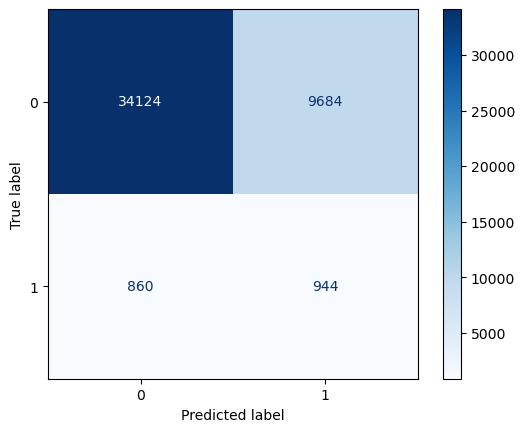

In [ ]:
# 0. X_train과 동일한 전처리 과정 적용 (예: row_mean, row_std 추가)
X_train_for_pred = X_train.copy()
X_train_for_pred['row_mean'] = X_train_for_pred.mean(axis=1)
X_train_for_pred['row_std'] = X_train_for_pred.std(axis=1)

# 1. 학습 데이터에 대한 예측
y_train_pred = final_model.predict(X_train_for_pred)
y_train_proba = final_model.predict_proba(X_train_for_pred)[:, 1]

# 2. 성능 지표 계산 (Train 데이터 기준)
train_auc = roc_auc_score(y_train, y_train_proba)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# 3. 출력
print(f'[Train 성능 평가]')
print(f'AUC: {train_auc:.4f}')
print(f'정확도 (Accuracy): {train_acc:.4f}')
print(f'정밀도 (Precision): {train_prec:.4f}')
print(f'재현율 (Recall): {train_recall:.4f}')
print(f'F1 점수: {train_f1:.4f}')
print(f'오차 행렬:\n{train_cm}')

# 4. 오차 행렬 시각화
ConfusionMatrixDisplay(confusion_matrix=train_cm).plot(cmap='Blues')


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 데이터 로딩
data = pd.read_csv("creditcard.csv")

# 특징/타겟 분리
X = data.drop('Class', axis=1)
y = data['Class']

# 정규화 (필요 시)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련/검증 분할
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 클래스 불균형 처리: SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 모델 훈련
model = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_res, y_train_res)

# 예측 확률
y_probs = model.predict_proba(X_val)[:, 1]

# Threshold 튜닝 (기본은 0.5, 여기서 최적 임계값 찾기)
threshold = 0.3  # 실험적으로 정밀도 중심 선택
y_pred = (y_probs >= threshold).astype(int)

# 성능 평가
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_probs)
cm = confusion_matrix(y_val, y_pred)

# 결과 출력
print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC: 0.9831
Precision: 0.5903
Recall: 0.8673
F1 Score: 0.7025
Confusion Matrix:
[[56805    59]
 [   13    85]]


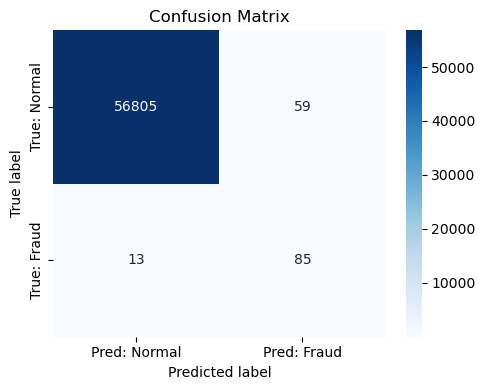

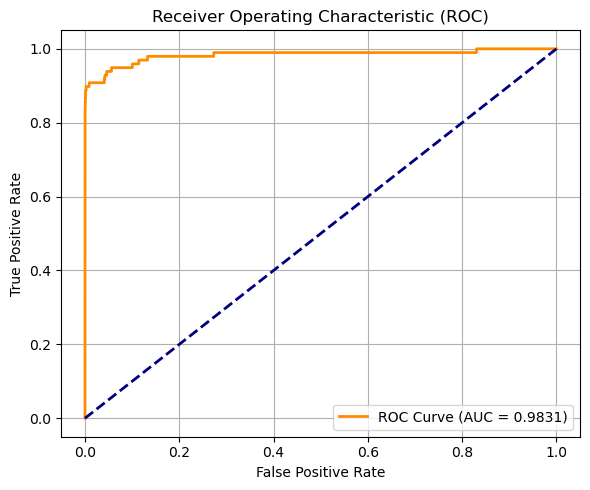

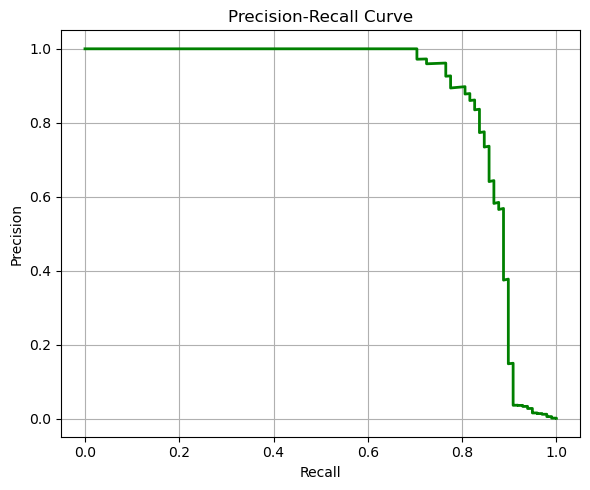

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 예시: 모델이 예측한 확률 값 (y_probs)과 실제 값 (y_val)을 알고 있다고 가정
# 실제 사용 시에는 예측 확률과 실제 타겟 레이블을 여기에 대입
# y_val = ...
# y_probs = ...
# y_pred = (y_probs >= 0.5).astype(int)

# 1. Confusion Matrix 시각화
cm = [[56805, 59],
      [13, 85]]

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Normal', 'Pred: Fraud'],
            yticklabels=['True: Normal', 'True: Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_probs)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. 예시 고객 데이터 로드
# customer_df: 고객 ID, 만족도, 나이, 사용 금액, 지역, 사용일수 등 포함된 데이터
customer_df = pd.read_csv('customer_data.csv')  # 예: customer_id, satisfaction, age, usage_amount, region, ...

# 2. 불만족 고객 필터링
unsatisfied_df = customer_df[customer_df['satisfaction'] == 0].copy()

# 3. 고객 세분화를 위한 특성 선택 및 스케일링
features = ['age', 'usage_amount', 'tenure_days']  # 예시 특성
X = StandardScaler().fit_transform(unsatisfied_df[features])

# 4. KMeans 군집화 (3개 군집 예시)
kmeans = KMeans(n_clusters=3, random_state=42)
unsatisfied_df['segment'] = kmeans.fit_predict(X)

# 5. 군집별 특성 파악
segment_summary = unsatisfied_df.groupby('segment')[features].mean()
print("불만족 고객 세그먼트 요약:")
print(segment_summary)

# 6. 마케팅 캠페인 전략 수립 (룰기반 예시)
def assign_campaign(segment):
    if segment == 0:
        return "장기 고객 대상 혜택 리마인드 캠페인"
    elif segment == 1:
        return "신규 고객 대상 환영 프로모션 재전송"
    elif segment == 2:
        return "고소비 고객 대상 프리미엄 업셀링"
    return "일반 리텐션 캠페인"

unsatisfied_df['marketing_strategy'] = unsatisfied_df['segment'].apply(assign_campaign)

# 7. 고객 맞춤형 서비스 전략 (예: 룰 기반 추천)
def recommend_service(row):
    if row['usage_amount'] < 50:
        return "기본 상품에 대한 사용 가이드 제공"
    elif row['tenure_days'] > 180:
        return "장기 고객 전용 전담 매니저 배정"
    elif row['age'] < 30:
        return "모바일 앱 최적화 기능 추천"
    else:
        return "전화 기반 고객 상담 서비스 제공"

unsatisfied_df['custom_service'] = unsatisfied_df.apply(recommend_service, axis=1)

# 8. 결과 저장
unsatisfied_df.to_csv('unsatisfied_customers_strategies.csv', index=False)
print("전략이 포함된 불만족 고객 리스트가 저장되었습니다.")


불만족 고객 세그먼트 요약:
               age  usage_amount  tenure_days
segment                                      
0        53.521739    118.934783   230.347826
1        40.500000    100.780000   598.200000
2        48.304348     75.591304   291.173913
전략이 포함된 불만족 고객 리스트가 저장되었습니다.


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np

# 랜덤 시드 고정
np.random.seed(42)

# 샘플 고객 수
n_customers = 200

# 예시 데이터 생성
customer_df = pd.DataFrame({
    'customer_id': range(1001, 1001 + n_customers),
    'satisfaction': np.random.choice([0, 1], size=n_customers, p=[0.3, 0.7]),  # 30% 불만족
    'age': np.random.randint(20, 70, size=n_customers),
    'usage_amount': np.random.normal(loc=100, scale=30, size=n_customers).round(1),  # 평균 사용금액
    'tenure_days': np.random.randint(30, 365*2, size=n_customers),  # 사용 기간 (일)
    'region': np.random.choice(['서울', '부산', '대구', '대전', '광주'], size=n_customers)
})

# 저장
customer_df.to_csv('customer_data.csv', index=False)
print("샘플 고객 데이터를 'customer_data.csv'로 저장했습니다.")


샘플 고객 데이터를 'customer_data.csv'로 저장했습니다.
